root is the path where the train/test data is stored,
train specifies training or test dataset,
download=True downloads the data from the internet if it’s not available at root.
transform and target_transform specify the feature and label transformations

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#torch.tensor() 可以处理图像数据，但是它不会自动进行图像特定的数据处理或转换。它可以将包含图像数据的 NumPy 数组转换为 PyTorch 张量。
#ToTensor 是一个数据转换函数，通常应用于图像数据或其他特定的数据类型。它会将输入数据转换为浮点型 (float) 张量，并且会自动处理数据类型和形状的推断。它会规范化图像数据，将像素值缩放到 [0, 1] 的范围内，并且可以处理多通道的图像数据。

In [2]:
training_data = datasets.FashionMNIST(root='data',train=True,download=True,transform=ToTensor())
test_data = datasets.FashionMNIST(root='data',train=False,download=True,transform=ToTensor())

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



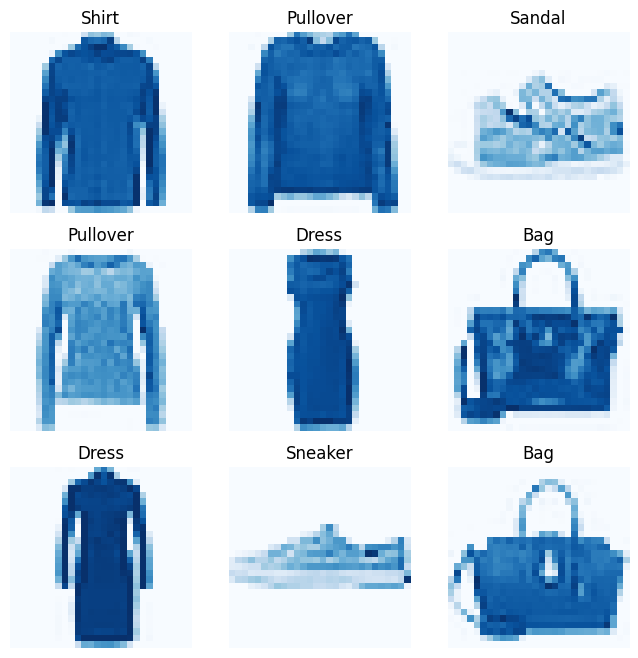

In [18]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8)) #告诉matplotlib创建一个新的图形对象，并将其大小设置为（8, 8）英寸。
cols, rows = 3, 3 #网格布局，可以摆放9张图像
for i in range(1,cols*rows+1):
    sample_dix = torch.randint(len(training_data),size=(1,)).item()
    img, label = training_data[sample_dix]
    figure.add_subplot(rows,cols,i) #i：指定要放置子图的位置，从左上角开始计数，从左到右，从上到下。
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(),cmap="Blues")
plt.show()

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

In [20]:
class CustomImageDataset(Dataset):
    def __init__(self,annotations_file,img_dir,transform = None,target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform #对标签进行额外操作

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        #os.path.join() 是一个Python内置函数，用于将多个路径组合成一个完整的路径字符串。
        #self.img_dir 是存储图像的目录路径，self.img_labels.iloc[idx, 0] 是图像文件名。
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        #The labels.csv file looks like:
        # tshirt1.jpg, 0
        # tshirt2.jpg, 0
        # ......
        # ankleboot999.jpg, 9
        #读取第二列就是类别的代号

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            image = self.target_transform(label)
        return image,label

In [21]:
from torch.utils.data import DataLoader

In [22]:
train_dataloader = DataLoader(training_data,batch_size=64,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=64,shuffle=True)
#Because we specified shuffle=True, after we iterate over all batches the data is shuffled

feature batch shape torch.Size([64, 1, 28, 28])
labels batch shape torch.Size([64])


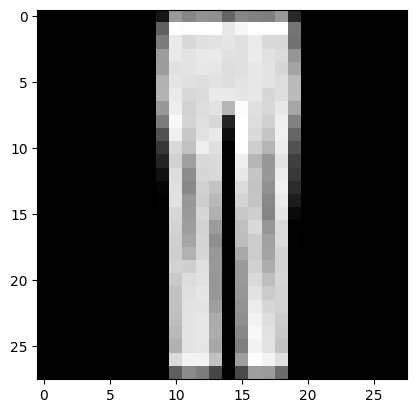

label:1
label 1


In [25]:
train_features,train_labels = next(iter(train_dataloader)) #获取下一个迭代器的元素
#train_features 是模型的输入特征
print("feature batch shape",train_features.size())
print("labels batch shape",train_labels.size())
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f"label:{label}")
print("label",label.item())